In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# For training dataset
train_data = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256)
)

# For validation dataset
val_data = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_data.map(process)
validation_ds = val_data.map(process)

In [7]:
import os

# Get the directory path from the DirectoryIterator object
dataset_path = '/content/train'

# Count the number of subdirectories (classes)
num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of classes:", num_classes)

Number of classes: 2


In [8]:
from tensorflow.keras.applications import VGG16 ,Xception

conv_base = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

In [9]:
conv_base.trainable = False

In [10]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [11]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(train_ds, epochs=10, validation_data=validation_ds,callbacks=[EarlyStopping(patience=3)])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 222ms/step - accuracy: 0.9781 - loss: 0.0644 - val_accuracy: 0.9914 - val_loss: 0.0243
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 220ms/step - accuracy: 0.9900 - loss: 0.0284 - val_accuracy: 0.9916 - val_loss: 0.0276
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 120s 192ms/step - accuracy: 0.9915 - loss: 0.0223 - val_accuracy: 0.9906 - val_loss: 0.0270
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 221ms/step - accuracy: 0.9929 - loss: 0.0173 - val_accuracy: 0.9918 - val_loss: 0.0255


In [13]:
from tensorflow.keras.models import load_model
model.save('model_without_augumentation.h5')

In [14]:
model.save('my_model_without_augumentation.keras')

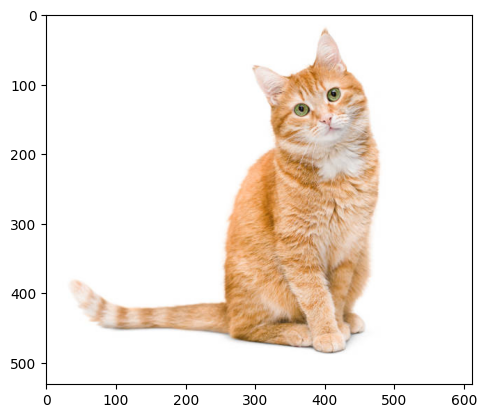

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction for cat1: [[9.9999809e-01 1.4625864e-06]]


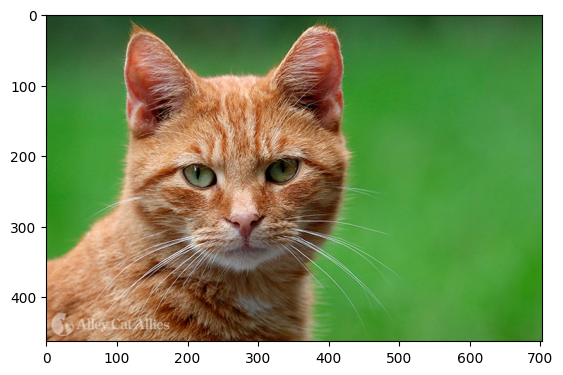

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction for cat2: [[9.999838e-01 9.281477e-06]]


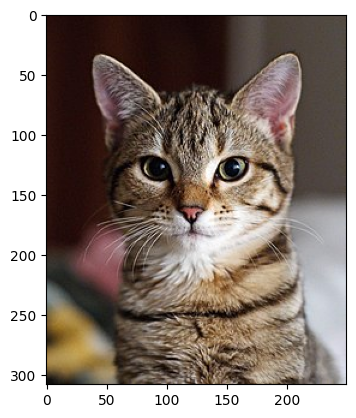

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for cat3: [[9.9999785e-01 1.7682866e-06]]


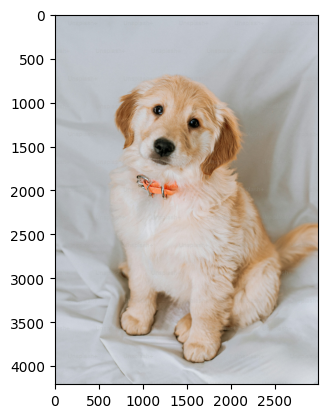

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction for dog0: [[1.5156977e-05 9.9998534e-01]]


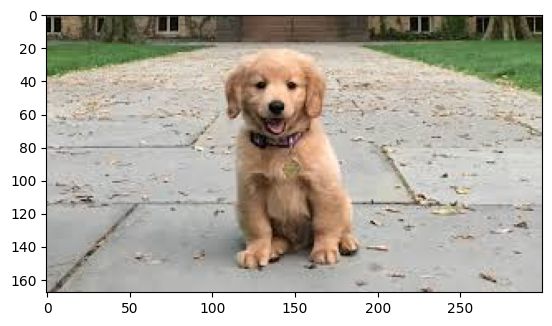

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction for dog1: [[4.4370424e-08 1.0000000e+00]]


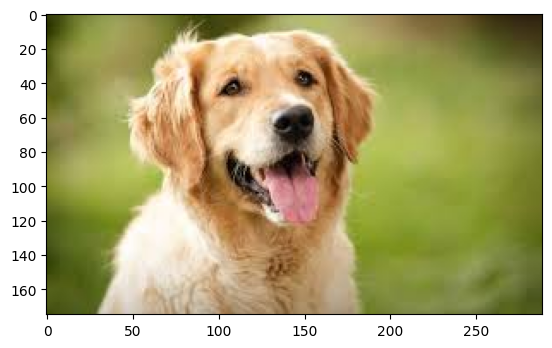

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for dog2: [[1.0355245e-08 1.0000000e+00]]


In [18]:
import cv2
import matplotlib.pyplot as plt

for i in range(1,4):
  img = cv2.imread(f'/content/Sample Testing Images/cat{i}.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  img_resized = cv2.resize(img, (256, 256))
  img_normalized = img_resized / 255.0
  img_reshaped = img_normalized.reshape((1, 256, 256, 3))

  # Predict with the model
  prediction = model.predict(img_reshaped)
  print(f"Prediction for cat{i}: {prediction}")

for i in range(0,3):
  img = cv2.imread(f'/content/Sample Testing Images/dog{i}.jpeg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  img_resized = cv2.resize(img, (256, 256))
  img_normalized = img_resized / 255.0
  img_reshaped = img_normalized.reshape((1, 256, 256, 3))

  # Predict with the model
  prediction = model.predict(img_reshaped)
  print(f"Prediction for dog{i}: {prediction}")